In [1]:
%load_ext autoreload
%autoreload 2

import volpick.data
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import pandas as pd
import time
from pathlib import Path
import datetime
import logging
import volpick
from volpick.data import NoiseData, AlaskaDataset
import numpy as np
from volpick.data.utils import (
    plot_waveforms,
    plot_spectrum,
    plot_spectrogram,
    check_waveform,
    check_waveforms_parallel,
)
import seisbench.data as sbd
import matplotlib.pyplot as plt
from obspy import read,Stream,Trace,UTCDateTime

import shutil

# Test

In [2]:
noise = NoiseData(root_folder_name="Noise")

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/Noise
/home/zhongyiyuan/DATA/my_data/Noise exists


In [3]:
catalog_table = pd.read_csv(noise.save_dir / "ak_mseed_log" / "downloads.csv")

In [4]:
catalog_table

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH120624T193505.250.mseed,100
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH120706T020349.600.mseed,100
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH120620T060814.445.mseed,100
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH080122T085754.840.mseed,100
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH060621T150107.420.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,FONW,...,NaN,NaN,58.8341,-153.9204,905.0,NaN,NaN,NaN,AV.FONW..EH130116T221438.476.mseed,100
73260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,FONW,...,NaN,NaN,58.8341,-153.9204,905.0,NaN,NaN,NaN,AV.FONW..EH090521T023158.920.mseed,100
73261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,DFR,...,NaN,NaN,60.5913,-152.6882,1090.0,NaN,NaN,NaN,AV.DFR..EH060110T190448.970.mseed,100
73262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,DFR,...,NaN,NaN,60.5913,-152.6882,1090.0,NaN,NaN,NaN,AV.DFR..EH140612T164050.510.mseed,100


In [5]:
selected_fig_dir=noise.save_dir/"figures_test"
selected_files=[x.name.replace("jpg","mseed") for x in selected_fig_dir.iterdir()]

In [1]:
x=[1,2,3]

In [2]:
y=[4,5,6]

In [3]:
z=x+y

In [4]:
z

[1, 2, 3, 4, 5, 6]

In [6]:
filtered_catalog_table=catalog_table[catalog_table["trace_name"].isin(selected_files)].copy()

In [7]:
dest_dir = "/home/zhongyiyuan/DATA/my_datasets_seisbench/noise_test_conversion"

volpick.data.convert_mseed_to_seisbench(
    filtered_catalog_table,
    mseed_dir=noise.save_dir / "ak_mseed",
    dest_dir=dest_dir,
    chunk="_aknoise",
    skip_spikes=True,
    split_prob=[0.85, 0.05, 0.1],
)

Traces converted: 0it [00:00, ?it/s]2023-09-07 22:47:29 | volpick | WARNING | Found multiple traces for AK.FALS..BHZ starting at 2008-09-09T17:44:28.980000Z. Completeness will be wrong in case of overlapping traces.
2023-09-07 22:47:29 | volpick | WARNING | Found multiple traces for AK.FALS..BHN starting at 2008-09-09T17:44:28.980000Z. Completeness will be wrong in case of overlapping traces.
2023-09-07 22:47:29 | volpick | WARNING | Found multiple traces for AK.FALS..BHE starting at 2008-09-09T17:44:28.980000Z. Completeness will be wrong in case of overlapping traces.
Traces converted: 24it [00:00, 226.99it/s]2023-09-07 22:47:29 | volpick | WARNING | Found multiple traces for AV.IVS..EHZ starting at 2002-09-13T03:31:26.804000Z. Completeness will be wrong in case of overlapping traces.
2023-09-07 22:47:29 | volpick | WARNING | Found multiple traces for AV.KAPH..EHE starting at 1999-03-02T22:22:19.085200Z. Completeness will be wrong in case of overlapping traces.
Traces converted: 47it 

In [9]:
dataset=sbd.WaveformDataset(dest_dir,
                            sampling_rate=100,
                            component_order="ZNE",
                            dimension_order="NCW",
                            cache="full",)

In [17]:
from obspy import Stream,Trace

Text(0.5, 1.0, 'AK.FALS..BH120525T123544.088.mseed')

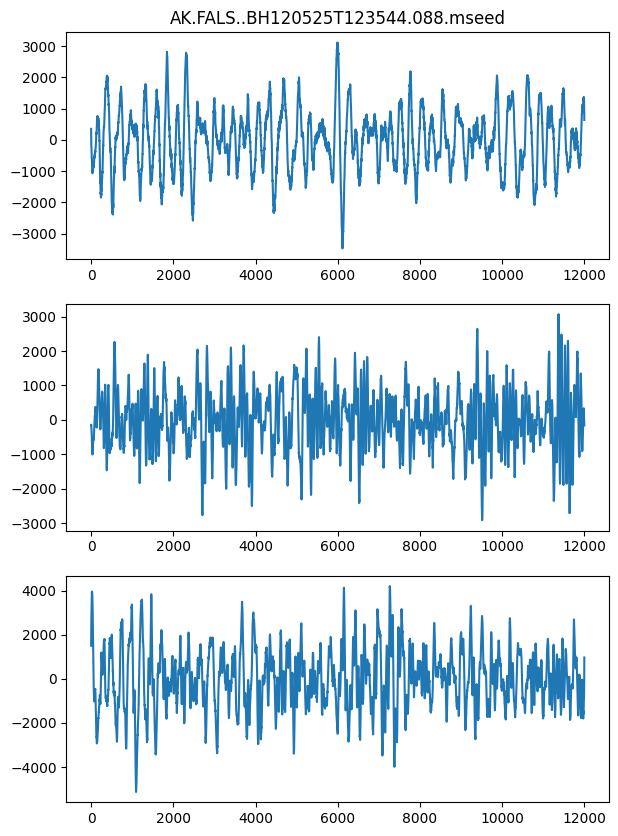

In [15]:
waveforms, metadata=dataset.get_sample(1)
waveforms.shape
fig,axs=plt.subplots(3,1,figsize=(7,10))
clrs=["blue","red","green"]
wave_labs=["Z","N","E"]
for j in range(3):
    axs[j].plot(waveforms[j])
    ymin,ymax=axs[0].get_ylim()
    # axs[j].vlines(x=metadata["trace_P_arrival_sample"],ymin=ymin,ymax=ymax,color='b')
    # axs[j].vlines(x=metadata["trace_S_arrival_sample"],ymin=ymin,ymax=ymax,color='r')
axs[0].set_title(metadata["trace_name_original"])

In [20]:
from obspy import read,UTCDateTime
st0=read()

In [21]:
st0[0].stats

         network: BW
         station: RJOB
        location: 
         channel: EHZ
       starttime: 2009-08-24T00:20:03.000000Z
         endtime: 2009-08-24T00:20:32.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3000
           calib: 1.0
    back_azimuth: 100.0
     inclination: 30.0
        response: Channel Response
	From M/S (Velocity in Meters Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 2.5168e+09 defined at 0.020 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.67785e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1

In [39]:

traces=[]
for j in range(3):
    traces.append(Trace(data=waveforms[j],header={"starttime":UTCDateTime(metadata["trace_start_time"]),"sampling_rate":metadata["trace_sampling_rate_hz"],"channel":dataset.component_order[j]}))
st=Stream(traces)

In [40]:
st.filter("highpass",freq=1)

3 Trace(s) in Stream:
...Z | 2012-05-25T12:35:44.088400Z - 2012-05-25T12:37:44.078400Z | 100.0 Hz, 12000 samples
...N | 2012-05-25T12:35:44.088400Z - 2012-05-25T12:37:44.078400Z | 100.0 Hz, 12000 samples
...E | 2012-05-25T12:35:44.088400Z - 2012-05-25T12:37:44.078400Z | 100.0 Hz, 12000 samples

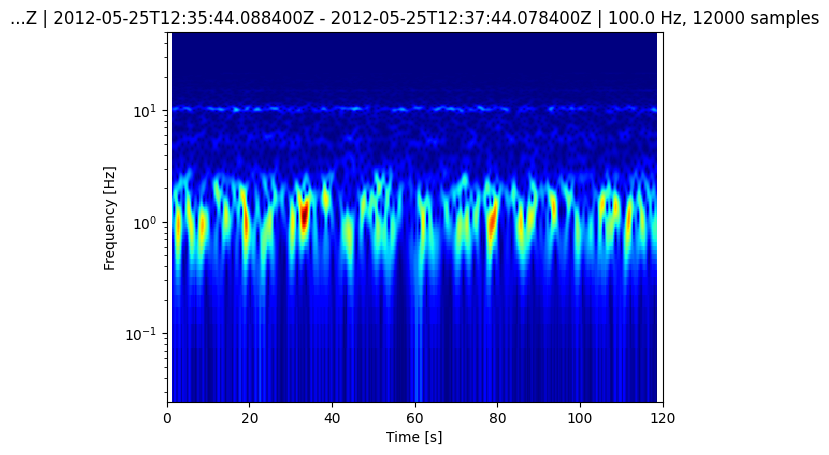

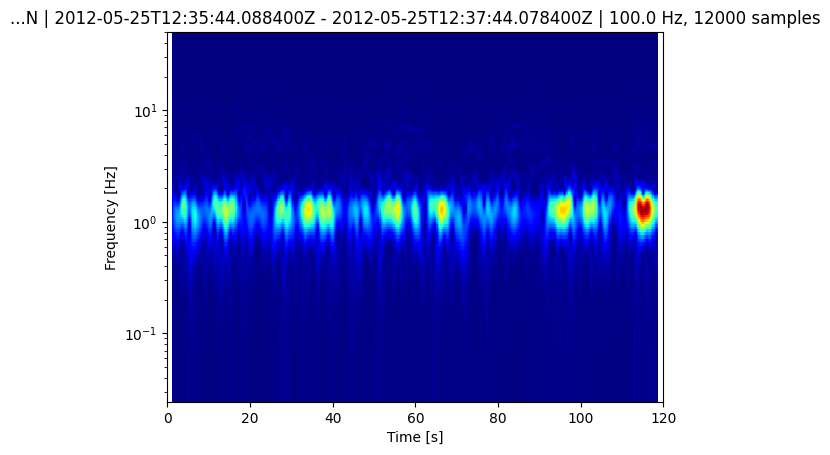

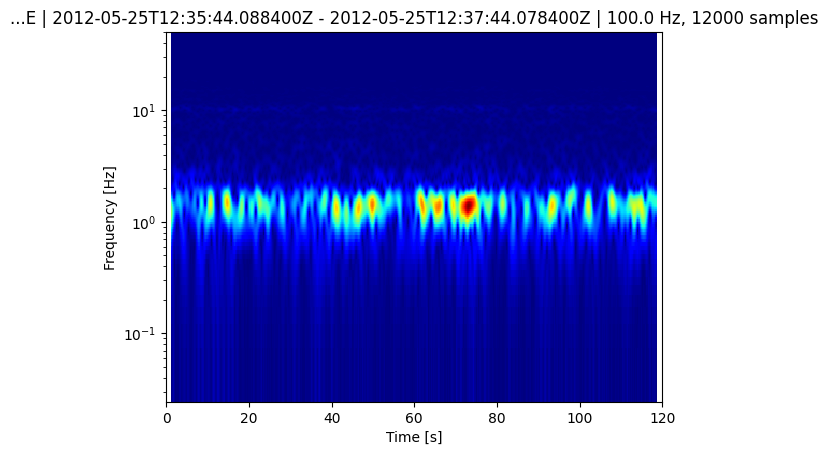

In [41]:
st.spectrogram(log=True,cmap='jet',wlen=2.56);

In [25]:
metadata[]

{'index': 1,
 'source_id': nan,
 'source_origin_time': nan,
 'source_latitude_deg': nan,
 'source_longitude_deg': nan,
 'source_depth_km': nan,
 'source_magnitude': nan,
 'source_magnitude_type': nan,
 'source_type': 'noise',
 'station_network_code': 'AK',
 'station_code': 'FALS',
 'station_location_code': '--',
 'trace_channel': 'BH',
 'station_latitude_deg': 54.8564,
 'station_longitude_deg': -163.4176,
 'station_elevation_m': 60.6,
 'station_epicentral_distance_m': nan,
 'path_azimuth_deg': nan,
 'path_back_azimuth_deg': nan,
 'trace_p_arrival_time': nan,
 'trace_s_arrival_time': nan,
 'trace_p_max_weight': nan,
 'trace_s_max_weight': nan,
 'trace_p_first_motion': nan,
 'trace_name': 'bucket0$0,:3,:12000',
 'trace_sampling_rate_hz': 100.0,
 'trace_has_spikes': False,
 'trace_start_time': '2012-05-25T12:35:44.088400Z',
 'trace_p_arrival_sample': nan,
 'trace_p_status': nan,
 'trace_s_arrival_sample': nan,
 'trace_s_status': nan,
 'trace_snr_db': '[nan, nan, nan]',
 'trace_mean_snr_db

In [31]:
dataset.component_order

'ZNE'

# AK

In [35]:
noise = NoiseData(root_folder_name="Noise")

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/Noise
/home/zhongyiyuan/DATA/my_data/Noise exists


In [36]:
catalog_table = pd.read_csv(noise.save_dir / "ak_mseed_log" / "downloads.csv")
ak_noise_traces=pd.read_csv("/mnt/DATA2/YiyuanZhong/my_data/Noise/ak_noise_fn_list.csv")
ak_noise_traces=list(ak_noise_traces["fname"].values)
ak_noise_traces=[x.replace("jpg","mseed") for x in ak_noise_traces]

In [37]:
len(ak_noise_traces)

7217

In [38]:
filtered_catalog_table=catalog_table[catalog_table["trace_name"].isin(ak_noise_traces)].copy()

In [40]:
filtered_catalog_table

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH120702T120126.580.mseed,100
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH061113T082558.810.mseed,100
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH081007T105522.450.mseed,100
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH060823T193113.340.mseed,100
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,AUNW,...,NaN,NaN,59.3775,-153.4790,160.0,NaN,NaN,NaN,AV.AUNW..EH071109T153818.980.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,FONW,...,NaN,NaN,58.8341,-153.9204,905.0,NaN,NaN,NaN,AV.FONW..EH070316T195212.050.mseed,100
73240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,FONW,...,NaN,NaN,58.8341,-153.9204,905.0,NaN,NaN,NaN,AV.FONW..EH111208T100921.500.mseed,100
73246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,FONW,...,NaN,NaN,58.8341,-153.9204,905.0,NaN,NaN,NaN,AV.FONW..EH070601T160048.330.mseed,100
73248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,noise,AV,FONW,...,NaN,NaN,58.8341,-153.9204,905.0,NaN,NaN,NaN,AV.FONW..EH070205T184137.080.mseed,100


In [41]:
dest_dir = "/home/zhongyiyuan/DATA/my_datasets_seisbench/ak_noise"

volpick.data.convert_mseed_to_seisbench(
    filtered_catalog_table,
    mseed_dir=noise.save_dir / "ak_mseed",
    dest_dir=dest_dir,
    chunk="_aknoise",
    skip_spikes=False,
    split_prob=[0.625, 0.125, 0.25],
    cut_bounds=5
)

Traces converted: 172it [00:00, 393.27it/s]2023-10-25 10:22:21 | volpick | WARNING | Found multiple traces for AV.KAPH..EHZ starting at 2001-11-05T10:44:46.935400Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:22:21 | volpick | WARNING | Found multiple traces for AV.KAPH..EHN starting at 2001-11-05T10:44:46.935400Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:22:21 | volpick | WARNING | Found multiple traces for AV.KAPH..EHZ starting at 1999-11-23T10:45:47.694000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:22:21 | volpick | WARNING | Found multiple traces for AV.KAPH..EHN starting at 1999-11-23T10:45:47.694000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:22:21 | volpick | WARNING | Found multiple traces for AV.KAPH..EHZ starting at 2006-11-19T02:26:45.077700Z. Completeness will be wrong in case of overlapping traces.
Traces converted: 212it [00:00, 358.67it/s]2023-10-25 10:

In [42]:
dataset=sbd.WaveformDataset("/mnt/DATA2/YiyuanZhong/my_datasets_seisbench/ak_noise",
                            sampling_rate=100,
                            component_order="ZNE",
                            dimension_order="NCW",
                            cache="full",)

In [44]:
print(len(dataset))

7217


In [43]:
print(len(dataset.train())/len(dataset))
print(len(dataset.dev())/len(dataset))
print(len(dataset.test())/len(dataset))

0.6178467507274491
0.1270611057225994
0.2550921435499515


# JP

In [14]:
noise = NoiseData(root_folder_name="Noise")

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/Noise
/home/zhongyiyuan/DATA/my_data/Noise exists


In [15]:
jp_noise_traces=pd.read_csv("/mnt/DATA2/YiyuanZhong/my_data/Noise/jp_noise_fn_list.csv")
jp_noise_traces=list(jp_noise_traces["fname"].values)
jp_noise_traces=[x.replace("jpg","mseed") for x in jp_noise_traces]
print(len(jp_noise_traces))

7585


In [16]:
catalog_table1 = pd.read_csv(noise.save_dir / "jp_mseed_log" / "downloads.csv")
filtered_catalog_table1=catalog_table1[catalog_table1["trace_name"].isin(jp_noise_traces)].copy()

catalog_table2 = pd.read_csv(noise.save_dir / "jp_mseed2_log" / "downloads.csv")
filtered_catalog_table2=catalog_table2[catalog_table2["trace_name"].isin(jp_noise_traces)].copy()

In [17]:
print(len(filtered_catalog_table1))
print(len(filtered_catalog_table2))

5686
1899


In [18]:
filtered_catalog_table=pd.concat([filtered_catalog_table1,filtered_catalog_table2],ignore_index=True)

In [19]:
dst_dir=noise.save_dir/"jp_mseed12"
if not dst_dir.exists():
    dst_dir.mkdir(parents=True, exist_ok=True)
    
    for fname in filtered_catalog_table1["trace_name"].values:
        shutil.copy2(noise.save_dir / "jp_mseed"/fname, noise.save_dir/"jp_mseed12"/fname)

    for fname in filtered_catalog_table2["trace_name"].values:
        shutil.copy2(noise.save_dir / "jp_mseed2"/fname, noise.save_dir/"jp_mseed12"/fname)    
else:
    print(f"{dst_dir} has already existed")

/home/zhongyiyuan/DATA/my_data/Noise/jp_mseed12 has already existed


In [20]:
dest_dir = "/home/zhongyiyuan/DATA/my_datasets_seisbench/jp_noise"

volpick.data.convert_mseed_to_seisbench(
    filtered_catalog_table,
    mseed_dir=noise.save_dir / "jp_mseed12",
    dest_dir=dest_dir,
    chunk="_jpnoise",
    skip_spikes=True,
    split_prob=[0.625, 0.125, 0.25],
    cut_bounds=5
)

Traces converted: 0it [00:00, ?it/s]

Traces converted: 7585it [00:24, 304.97it/s]


In [21]:
dataset=sbd.WaveformDataset("/mnt/DATA2/YiyuanZhong/my_datasets_seisbench/jp_noise",
                            sampling_rate=100,
                            component_order="ZNE",
                            dimension_order="NCW",
                            cache="full",)

(3, 11000)


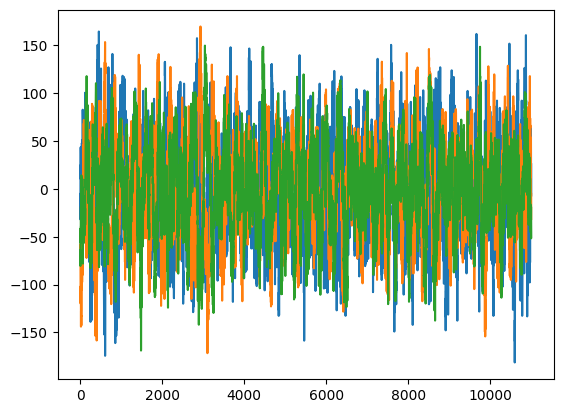

In [23]:
x=dataset.get_waveforms(193)
print(x.shape)
plt.plot(x.T);


In [24]:
print(len(dataset.train())/len(dataset))
print(len(dataset.dev())/len(dataset))
print(len(dataset.test())/len(dataset))

0.624390243902439
0.12893869479235334
0.24667106130520763


# HW

In [25]:
noise = NoiseData(root_folder_name="Noise")

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/Noise
/home/zhongyiyuan/DATA/my_data/Noise exists


In [26]:
catalog_table = pd.read_csv(noise.save_dir / "hw_mseed_log" / "downloads.csv")
hw_noise_traces=pd.read_csv("/mnt/DATA2/YiyuanZhong/my_data/Noise/hw_noise_fn_list.csv")
hw_noise_traces=list(hw_noise_traces["fname"].values)
hw_noise_traces=[x.replace("jpg","mseed") for x in hw_noise_traces]

In [27]:
filtered_catalog_table=catalog_table[catalog_table["trace_name"].isin(hw_noise_traces)].copy()

In [28]:
len(filtered_catalog_table)

5198

In [29]:
7217+5198+7585

20000

In [30]:
dest_dir = "/home/zhongyiyuan/DATA/my_datasets_seisbench/hw_noise"

volpick.data.convert_mseed_to_seisbench(
    filtered_catalog_table,
    mseed_dir=noise.save_dir / "hw_mseed",
    dest_dir=dest_dir,
    chunk="_hwnoise",
    skip_spikes=True,
    split_prob=[0.625, 0.125, 0.25],
    cut_bounds=5
)

Traces converted: 1032it [00:02, 422.66it/s]2023-10-25 10:18:45 | volpick | WARNING | Found multiple traces for PT.KHU..HHZ starting at 2016-03-26T01:23:18.370000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:18:45 | volpick | WARNING | Found multiple traces for PT.KHU..HHN starting at 2016-03-26T01:23:18.370000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:18:45 | volpick | WARNING | Found multiple traces for PT.KHU..HHE starting at 2016-03-26T01:23:18.370000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:18:45 | volpick | WARNING | Found multiple traces for PT.KHU..HHZ starting at 2016-02-06T22:01:33.680000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:18:45 | volpick | WARNING | Found multiple traces for PT.KHU..HHN starting at 2016-02-06T22:01:33.680000Z. Completeness will be wrong in case of overlapping traces.
2023-10-25 10:18:45 | volpick | WARNING | Found multiple trac

In [33]:
dataset=sbd.WaveformDataset("/mnt/DATA2/YiyuanZhong/my_datasets_seisbench/hw_noise",
                            sampling_rate=100,
                            component_order="ZNE",
                            dimension_order="NCW",
                            cache="full",)

In [34]:
print(len(dataset.train())/len(dataset))
print(len(dataset.dev())/len(dataset))
print(len(dataset.test())/len(dataset))

0.6283185840707964
0.12677953058868796
0.24490188534051557


# 草稿

In [2]:
dataset=sbd.WaveformDataset("/mnt/DATA2/YiyuanZhong/my_datasets_seisbench/vcseis_my_noise",
                            sampling_rate=100,
                            component_order="ZNE",
                            dimension_order="NCW",
                            cache="full",)

NameError: name 'sbd' is not defined

In [1]:
len(dataset)

NameError: name 'dataset' is not defined